<a href="https://colab.research.google.com/github/krukj/TwitterBotDetection/blob/main/notebooks/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# code source: https://mccormickml.com/2019/07/22/BERT-fine-tuning/

In [22]:
# COLAB SETUP
# Clone repo
#!git clone https://github.com/krukj/TwitterBotDetection.git

# change directory
#%cd TwitterBotDetection

import sys
sys.path.append('/content/TwitterBotDetection')
from src.preprocessing import TweetFeatureExtractor, TweetProcessor
DATA_PATH = "data"
import pandas as pd
import sys
import os
import warnings

In [23]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [24]:
import os
print(os.path.exists("data/TwiBot20/tweets/train.json"))


True


In [25]:
train = pd.read_json("data/TwiBot20/tweets/train.json")
y = train["label"]
X = train.drop(columns=["label"])

In [13]:
import pandas as pd
import sys
import os
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

from preprocessing import TweetFeatureExtractor, TweetProcessor

DATA_PATH = "../data"

In [ ]:
train = pd.read_json(DATA_PATH + "/TwiBot20/tweets/train.json")
y = train["label"]
X = train.drop(columns=["label"])

In [26]:
train.head()

,ID,profile,tweet,neighbor,domain,label
0,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,None,"[Politics, Business, Entertainment]",0
1,1297437077403885568,"{'id': '1297437077403885568 ', 'id_str': '1297...",None,"{'following': ['170861207', '23970102', '47293...",[Politics],1
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",0
3,15750898,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,"{'following': ['2324715174', '24030137', '2336...",[Politics],0
4,1659167666,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,"{'following': ['1628313708', '726405625', '130...",[Politics],1


In [27]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    steps=[
        ("feature_extractor", TweetFeatureExtractor()),
        ("tweet_processor", TweetProcessor()),
    ]
)

In [28]:
X_transformed = pipeline.transform(X=X)

/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [29]:
X_transformed.head()

,ID,profile,tweet,neighbor,domain,tweets_joined,avg_word_count,avg_character_count,avg_hashtag_count,avg_mention_count,avg_link_count,avg_emoji_count,avg_positive_word_count,avg_negative_word_count
0,17461978,"{'id': '17461978 ', 'id_str': '17461978 ', 'na...",[RT @CarnivalCruise: 🎉 Are you ready to see wh...,None,"[Politics, Business, Entertainment]",rt USER EMOJI ready see newest ship’s name wil...,24.565000,166.275000,0.760000,1.855,1.035000,0.265000,0.935000,0.240000
1,1297437077403885568,"{'id': '1297437077403885568 ', 'id_str': '1297...",None,"{'following': ['170861207', '23970102', '47293...",[Politics],,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,17685258,"{'id': '17685258 ', 'id_str': '17685258 ', 'na...",[RT @realDonaldTrump: THANK YOU #RNC2020! http...,"{'following': ['46464108', '21536398', '186434...","[Politics, Entertainment, Sports]",rt USER thank rnc2020 LINK sep great takeaways...,20.770000,139.155000,0.185000,1.020,0.480000,0.175000,0.680000,0.485000
3,15750898,"{'id': '15750898 ', 'id_str': '15750898 ', 'na...",[A family fears they may have been cheated out...,"{'following': ['2324715174', '24030137', '2336...",[Politics],family fears may cheated 20000 donations raise...,24.530000,166.195000,0.305000,0.500,0.865000,0.075000,0.510000,0.475000
4,1659167666,"{'id': '1659167666 ', 'id_str': '1659167666 ',...",[RT @VonteThePlug: Yeah but he ain’t got one h...,"{'following': ['1628313708', '726405625', '130...",[Politics],rt USER yeah ain’t got one happy song nigga al...,13.579545,85.761364,0.068182,0.625,0.670455,0.602273,0.318182,0.545455


In [30]:
tweets = X_transformed["tweets_joined"].tolist()

In [31]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [32]:
print("Original: ", tweets[0])

Original:  rt USER EMOJI ready see newest ship’s name will EMOJI thanks partners helping us unbox name… sep time receipts USER receipt scanners make easy mess stress check LINK LINK sep steady wants encourage invest financial future connect bank account USER access benefits income insights online medical visits cash grants 1000 started today visiting LINK sponsored LINK sep good one USER let’s see yall better come everybody show best handshaq ad LINK LINK sep lsunationalchamps sep stand student athletes wewanttoplay sep wish luck america i’m back sharkweek starts tonight 8p et USER catch taking ultimate plunge shaqattack tomorrow 9p et LINK sep joining tennis champion USER USERs leadingthroughchange join us allstar episode today 10 pt LINK LINK sep let’s today im nominating USER LINK USER USER USER mystartingfive employees amp customers ready vote november take pledge today amp register —gt LINK LINK sep first shaqvsgronk 9 million live viewers helped USER raise money USER USER 125 mil

In [33]:
print("Tokenized: ", tokenizer.tokenize(tweets[0]))

Tokenized:  ['rt', 'user', 'em', '##oj', '##i', 'ready', 'see', 'newest', 'ship', '’', 's', 'name', 'will', 'em', '##oj', '##i', 'thanks', 'partners', 'helping', 'us', 'un', '##box', 'name', '…', 'sep', 'time', 'receipts', 'user', 'receipt', 'scanner', '##s', 'make', 'easy', 'mess', 'stress', 'check', 'link', 'link', 'sep', 'steady', 'wants', 'encourage', 'invest', 'financial', 'future', 'connect', 'bank', 'account', 'user', 'access', 'benefits', 'income', 'insights', 'online', 'medical', 'visits', 'cash', 'grants', '1000', 'started', 'today', 'visiting', 'link', 'sponsored', 'link', 'sep', 'good', 'one', 'user', 'let', '’', 's', 'see', 'ya', '##ll', 'better', 'come', 'everybody', 'show', 'best', 'hands', '##ha', '##q', 'ad', 'link', 'link', 'sep', 'lsu', '##national', '##champ', '##s', 'sep', 'stand', 'student', 'athletes', 'we', '##wan', '##tto', '##play', 'sep', 'wish', 'luck', 'america', 'i', '’', 'm', 'back', 'shark', '##week', 'starts', 'tonight', '8', '##p', 'et', 'user', 'catch

In [34]:
print("Token IDs: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(tweets[0])))

Token IDs:  [19387, 5310, 7861, 29147, 2072, 3201, 2156, 14751, 2911, 1521, 1055, 2171, 2097, 7861, 29147, 2072, 4283, 5826, 5094, 2149, 4895, 8758, 2171, 1529, 19802, 2051, 28258, 5310, 24306, 26221, 2015, 2191, 3733, 6752, 6911, 4638, 4957, 4957, 19802, 6706, 4122, 8627, 15697, 3361, 2925, 7532, 2924, 4070, 5310, 3229, 6666, 3318, 20062, 3784, 2966, 7879, 5356, 8624, 6694, 2318, 2651, 5873, 4957, 6485, 4957, 19802, 2204, 2028, 5310, 2292, 1521, 1055, 2156, 8038, 3363, 2488, 2272, 7955, 2265, 2190, 2398, 3270, 4160, 4748, 4957, 4957, 19802, 21849, 25434, 25450, 2015, 19802, 3233, 3076, 7576, 2057, 7447, 9284, 13068, 19802, 4299, 6735, 2637, 1045, 1521, 1049, 2067, 11420, 28075, 4627, 3892, 1022, 2361, 3802, 5310, 4608, 2635, 7209, 25912, 21146, 19062, 5946, 3600, 4826, 1023, 2361, 3802, 4957, 19802, 5241, 5093, 3410, 5310, 5198, 2877, 2705, 22494, 5603, 22305, 2063, 3693, 2149, 2035, 14117, 2792, 2651, 2184, 13866, 4957, 4957, 19802, 2292, 1521, 1055, 2651, 10047, 2053, 27932, 5310, 4

In [35]:
max_len = 0
for tweet in tweets:
    input_ids = tokenizer.encode(tweet, add_special_tokens=True)
    max_len = max(max_len, len(input_ids))
print("Max length: ", max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (4266 > 512). Running this sequence through the model will result in indexing errors


Max length:  27290


In [36]:
# tokenizing tweets
input_ids = []
attention_masks = []
i = 0
for tweet in tweets:
    if i % 1000 == 0:
        print("iter: ", i)
    encoded_dict = tokenizer.encode_plus(
        tweet,
        add_special_tokens=True,
        max_length=512,
        padding="max_length",
        truncation=True,
        return_attention_mask=True,
        return_tensors="pt",
    )
    input_ids.append(encoded_dict["input_ids"])
    attention_masks.append(encoded_dict["attention_mask"])
    i += 1

iter:  0
iter:  1000
iter:  2000
iter:  3000
iter:  4000
iter:  5000
iter:  6000
iter:  7000
iter:  8000


In [37]:
import torch

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(y)

In [38]:
from torch.utils.data import TensorDataset, random_split

dataset = TensorDataset(input_ids, attention_masks, labels)

In [39]:
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [40]:
print("{:>5,} training samples".format(train_size))
print("{:>5,} validation samples".format(val_size))

7,450 training samples
  828 validation samples


In [41]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32
train_dataloader = DataLoader(
    dataset=train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size
)
val_dataloader = DataLoader(
    dataset=val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size
)

In [43]:
from transformers import BertForSequenceClassification, BertConfig
from torch.optim import AdamW
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2,
    output_attentions=False,
    output_hidden_states=False,
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# local
# device = torch.device("cpu")
# model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# local
# input_ids = input_ids.to(device)
# attention_mask = attention_masks.to(device)
# labels = labels.to(device)

In [45]:
params = list(model.named_parameters())
print("The BERT model has {:} different named parameters.\n".format(len(params)))
print("==== Embedding Layer ====\n")

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("\n==== First Transformer ====\n")

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("\n==== Output Layer ====\n")

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [46]:
optimizer = AdamW(params=model.parameters(), lr=2e-5, eps=1e-8)

In [47]:
from transformers import get_linear_schedule_with_warmup

epochs = 4
total_steps = len(train_dataset) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer=optimizer, num_warmup_steps=0, num_training_steps=total_steps
)

In [48]:
import numpy as np


def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [49]:
import time
import datetime


def format_time(elapsed):
    elapsed_rounded = int(round(elapsed))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [50]:
import random

seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [53]:
training_stats = []
total_t0 = time.time()
for epoch in range(0, epochs):
    print("")
    print("======== Epoch {:} / {:} ========".format(epoch + 1, epochs))
    print("Training...")

    t0 = time.time()
    total_train_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print(
                "  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.".format(
                    step, len(train_dataloader), elapsed
                )
            )

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()

        outputs = model(
            b_input_ids,
            token_type_ids=None,
            attention_mask=b_input_mask,
            labels=b_labels,
        )

        loss = outputs.loss
        logits = outputs.logits
        total_train_loss += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in val_dataloader:

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here:
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            outputs = model(
                b_input_ids,
                token_type_ids=None,
                attention_mask=b_input_mask,
                labels=b_labels,
            )

            loss = outputs.loss
            logits = outputs.logits

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to("cpu").numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(val_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(val_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            "epoch": epoch + 1,
            "Training Loss": avg_train_loss,
            "Valid. Loss": avg_val_loss,
            "Valid. Accur.": avg_val_accuracy,
            "Training Time": training_time,
            "Validation Time": validation_time,
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time() - total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    233.    Elapsed: 0:01:48.
  Batch    80  of    233.    Elapsed: 0:03:41.
  Batch   120  of    233.    Elapsed: 0:05:36.
  Batch   160  of    233.    Elapsed: 0:07:31.
  Batch   200  of    233.    Elapsed: 0:09:26.

  Average training loss: 0.52
  Training epcoh took: 0:11:01

Running Validation...
  Accuracy: 0.72
  Validation Loss: 0.55
  Validation took: 0:00:25

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    233.    Elapsed: 0:01:54.
  Batch    80  of    233.    Elapsed: 0:03:49.
  Batch   120  of    233.    Elapsed: 0:05:45.
  Batch   160  of    233.    Elapsed: 0:07:40.
  Batch   200  of    233.    Elapsed: 0:09:36.

  Average training loss: 0.45
  Training epcoh took: 0:11:11

Running Validation...
  Accuracy: 0.73
  Validation Loss: 0.54
  Validation took: 0:00:25

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    233.    Elapsed: 0:01:54.
  Batch    80  of    233.    Elapsed: 0:03:49.
 

In [56]:
# Display floats with two decimal places.

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

df_stats = df_stats.set_index('epoch')

df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.521465,0.551203,0.722356,0:11:01,0:00:25
2,0.448711,0.541143,0.728880,0:11:11,0:00:25
3,0.393904,0.591788,0.745879,0:11:11,0:00:25
4,0.297115,0.814252,0.714629,0:11:10,0:00:25


In [59]:
df_stats.to_csv("results/stats.csv")

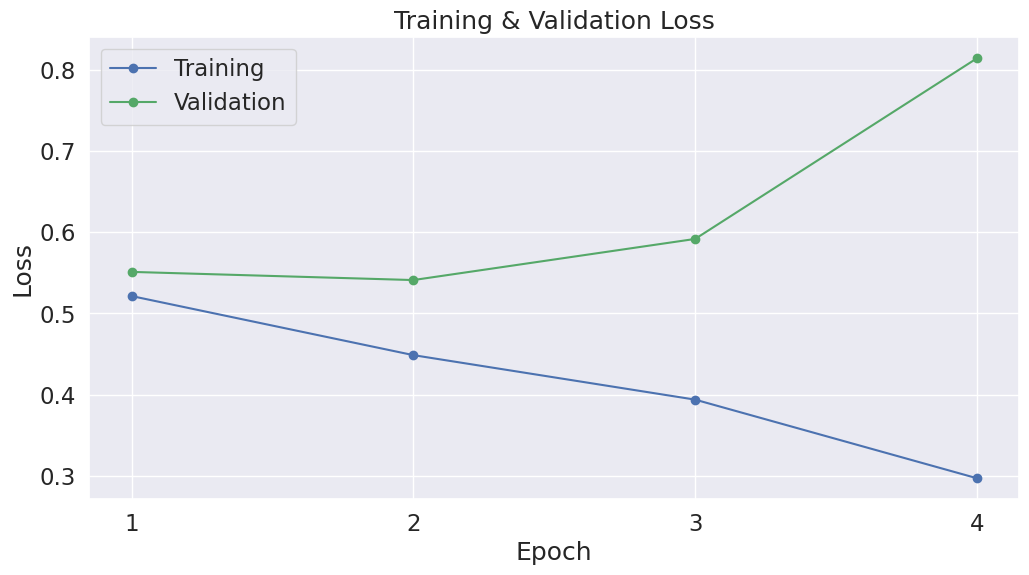

In [57]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()